#### SECTION 1: SETUP AND DATA LOADING

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for matplotlib
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("=" * 60)
print("TRACKING MATERNAL HEALTH PROGRESS TOWARD SDG 3.1")
print("A Global Data Analysis")
print("=" * 60)

# Load the dataset
# Note: Replace 'your_file_path.csv' with actual file path
df_2 = pd.read_csv('maternal_health_data.csv', encoding='ISO-8859-1')

print(f"\nDataset loaded successfully!")
print(f"Dataset shape: {df_2.shape}")
print(f"Columns: {list(df_2.columns)}")

TRACKING MATERNAL HEALTH PROGRESS TOWARD SDG 3.1
A Global Data Analysis

Dataset loaded successfully!
Dataset shape: (1295, 15)
Columns: ['AreaID', 'AreaName', 'TimePeriod', 'Source', 'Sector', 'Subsector', 'Goal', 'Target', 'Indicator', 'Unit', 'SubgroupDimension', 'Subgroup', 'SubgroupOrder', 'DataValue', 'Footnote']


#### SECTION 2: EXPLORATORY DATA ANALYSIS

In [9]:
print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# Basic dataset information
print("\n1. Dataset Overview:")
print("-" * 30)
print(df_2.info())

print("\n2. Dataset Description:")
print("-" * 30)
print(df_2.describe())

print("\n3. Missing Values:")
print("-" * 30)
missing_data = df_2.isnull().sum()
missing_percentage = (missing_data / len(df_2)) * 100
missing_df_2 = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)
print(missing_df_2[missing_df_2['Missing Count'] > 0])

print("\n4. Unique Values in Key Columns:")
print("-" * 30)
key_columns = ['AreaName', 'TimePeriod', 'Source', 'Goal', 'Target', 'Indicator', 'Unit']
for col in key_columns:
    if col in df_2.columns:
        print(f"{col}: {df_2[col].nunique()} unique values")

# Display first few rows
print("\n5. Sample Data:")
print("-" * 30)
print(df_2.head())



EXPLORATORY DATA ANALYSIS

1. Dataset Overview:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AreaID             1295 non-null   object
 1   AreaName           1295 non-null   object
 2   TimePeriod         1295 non-null   object
 3   Source             1295 non-null   object
 4   Sector             1295 non-null   object
 5   Subsector          1295 non-null   object
 6   Goal               1295 non-null   object
 7   Target             1295 non-null   object
 8   Indicator          1295 non-null   object
 9   Unit               1295 non-null   object
 10  SubgroupDimension  1295 non-null   object
 11  Subgroup           1295 non-null   object
 12  SubgroupOrder      1295 non-null   int64 
 13  DataValue          1295 non-null   object
 14  Footnote           18 non-null     object
dtypes: int64(

#### SECTION 3: DATA CLEANING AND PREPROCESSING

In [11]:
print("\n" + "="*60)
print("DATA CLEANING AND PREPROCESSING")
print("="*60)

# Create a copy for processing
df_2_clean = df_2.copy()

# Handle missing values in DataValue (core metric)
print(f"\nMissing values in DataValue: {df_2_clean['DataValue'].isnull().sum()}")

# Convert DataValue to numeric (handle any string representations)
df_2_clean['DataValue'] = pd.to_numeric(df_2_clean['DataValue'], errors='coerce')

# Convert TimePeriod to datetime if possible, otherwise keep as is
df_2_clean['TimePeriod'] = pd.to_numeric(df_2_clean['TimePeriod'], errors='coerce')

# Filter for SDG 3.1 related indicators
sdg_3_1_keywords = [
    'maternal', 'mortality', 'birth', 'antenatal', 'skilled', 'adolescent', 
    'pregnancy', 'delivery', 'prenatal', 'postnatal'
]

# Create boolean mask for SDG 3.1 related rows
sdg_mask = df_2_clean['Indicator'].str.contains('|'.join(sdg_3_1_keywords), 
                                            case=False, na=False)
df_2_sdg = df_2_clean[sdg_mask].copy()

print(f"Filtered dataset for SDG 3.1 indicators: {df_2_sdg.shape[0]} rows")

# Remove rows with missing DataValue for core analysis
df_2_analysis = df_2_sdg.dropna(subset=['DataValue']).copy()
print(f"Dataset after removing missing DataValue: {df_2_analysis.shape[0]} rows")

print("\nUnique Indicators in filtered dataset:")
print("-" * 40)
for i, indicator in enumerate(df_2_analysis['Indicator'].unique(), 1):
    print(f"{i}. {indicator}")


DATA CLEANING AND PREPROCESSING

Missing values in DataValue: 0
Filtered dataset for SDG 3.1 indicators: 45 rows
Dataset after removing missing DataValue: 45 rows

Unique Indicators in filtered dataset:
----------------------------------------
1. 16.9.1: Percentage of births registered
2. 17.19.2: Proportion of States/UTs that have achieved 100 per cent birth registration and 80 per cent death registration
3. 3.1.1: Maternal Mortality Ratio (MMR), (per 1,00,000 live births)
4. 3.1.2: Percentage of births attended by skilled health personnel (period 5 years)
5. 3.1.3: Percentage of births attended by skilled health personnel (period 1 years)
6. 3.1.4: Percentage of women aged 15-49 years with a live birth, for last birth, who received antenatal care, four times or more(period for 5 years / 1 year)
7. 3.2.1: Under-five Mortality Rate
8. 3.2.2: Neonatal Mortality Rate
9. 3.4.2. Suicide mortality rate (per 1,00,000 population)
10. 3.7.2: Adolescent birth rate (aged 1519 years) per 1,000 

#### SECTION 4: MATERNAL MORTALITY ANALYSIS


MATERNAL MORTALITY ANALYSIS
Maternal Mortality Ratio data points: 3

Found MMR indicators:
• 3.1.1: Maternal Mortality Ratio (MMR), (per 1,00,000 live births)

Latest available year: nan
Countries with latest MMR data: 0
Countries meeting SDG 3.1 target (MMR < 70): 0


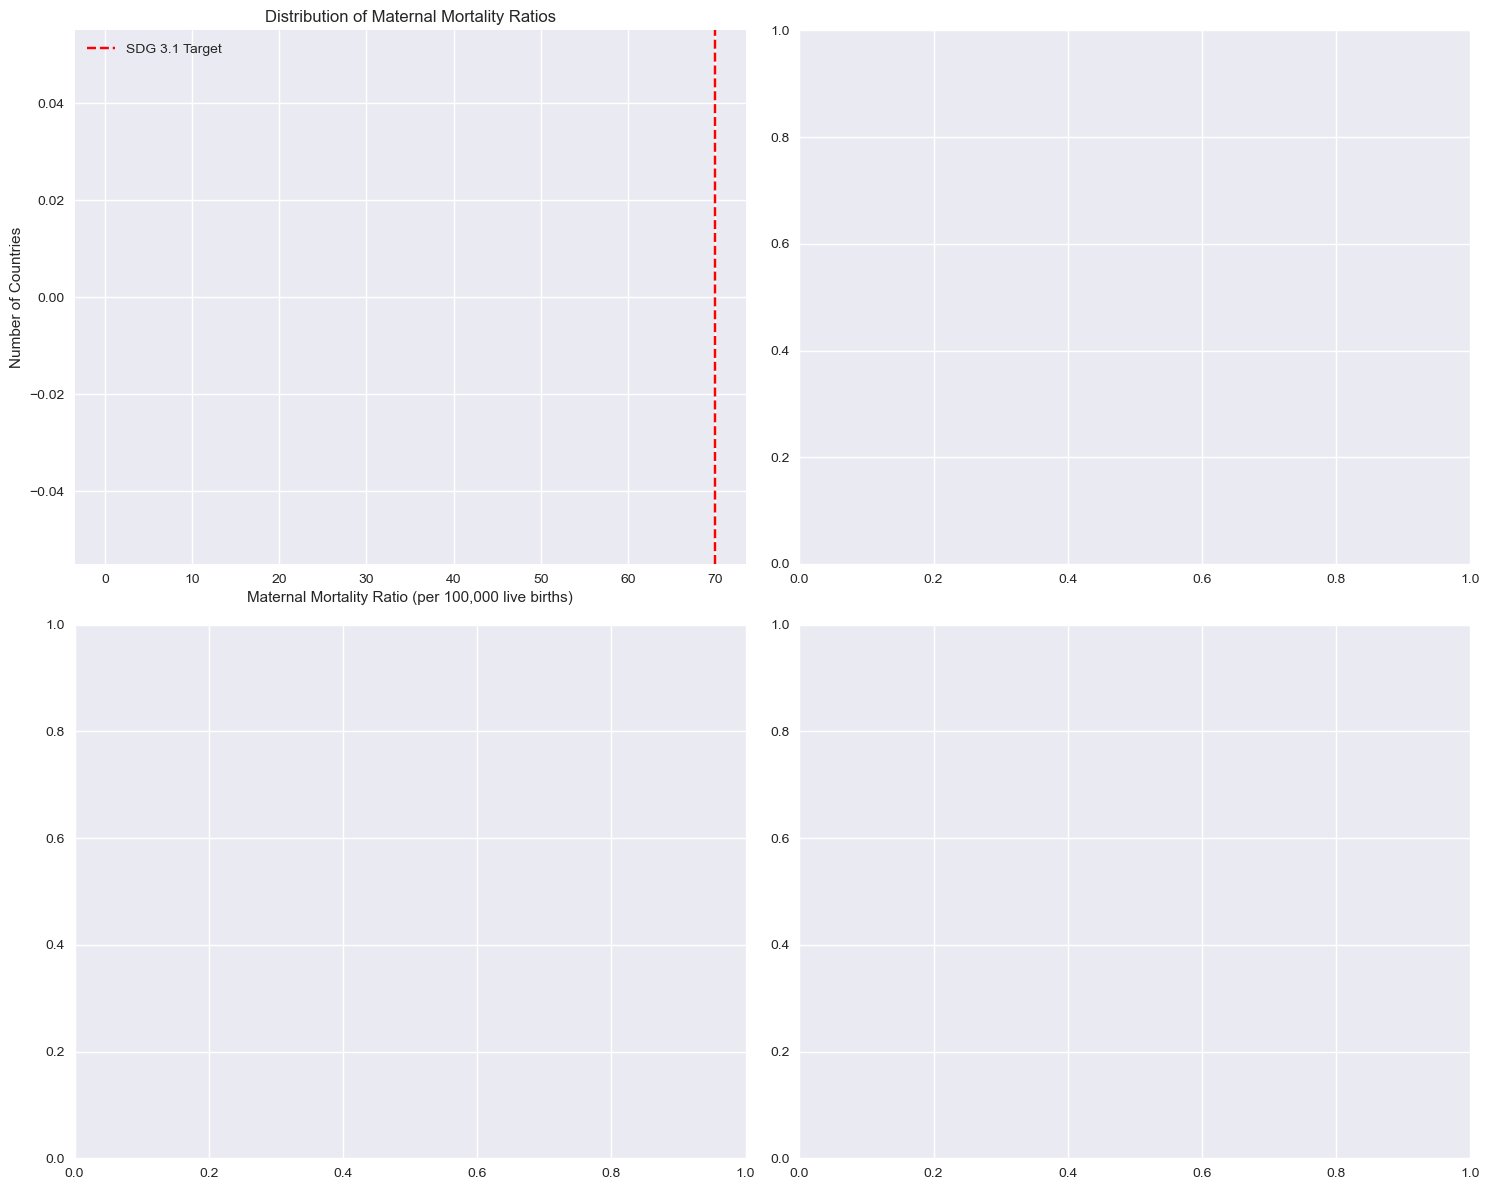

In [15]:
print("\n" + "="*60)
print("MATERNAL MORTALITY ANALYSIS")
print("="*60)

# Filter for maternal mortality ratio indicators - ENHANCED VERSION
mmr_keywords = [
    'maternal mortality', 'maternal deaths', 'mmr', 'maternal death', 
    'death.*maternal', 'mortality.*maternal', 'maternal.*mortality',
    'deaths.*per.*100.*000', 'mortality.*ratio', 'pregnancy.*mortality',
    'pregnancy.*death', 'childbirth.*death', 'obstetric.*mortality'
]
mmr_pattern = '|'.join(mmr_keywords)
mmr_mask = df_2_analysis['Indicator'].str.contains(mmr_pattern, case=False, na=False, regex=True)
df_2_mmr = df_2_analysis[mmr_mask].copy()

print(f"Maternal Mortality Ratio data points: {df_2_mmr.shape[0]}")

# Debug: Show what indicators were matched
if not df_2_mmr.empty:
    print(f"\nFound MMR indicators:")
    for indicator in df_2_mmr['Indicator'].unique():
        print(f"• {indicator}")
        
# If still no direct MMR data found, let's check what indicators we have
if df_2_mmr.empty:
    print("\nNo direct maternal mortality indicators found.")
    print("Let's examine all available indicators:")
    print("-" * 50)
    all_indicators = df_2_analysis['Indicator'].unique()
    for i, indicator in enumerate(all_indicators, 1):
        print(f"{i}. {indicator}")
    
    # Try broader search for any mortality-related indicators
    broader_mmr_keywords = ['mortality', 'death', 'ratio']
    broader_pattern = '|'.join(broader_mmr_keywords)
    broader_mask = df_2_analysis['Indicator'].str.contains(broader_pattern, case=False, na=False, regex=True)
    df_2_mmr_broader = df_2_analysis[broader_mask].copy()
    
    if not df_2_mmr_broader.empty:
        print(f"\nFound {df_2_mmr_broader.shape[0]} indicators containing mortality/death/ratio keywords:")
        for indicator in df_2_mmr_broader['Indicator'].unique():
            print(f"• {indicator}")
        
        # Use the broader dataset for analysis
        df_2_mmr = df_2_mmr_broader.copy()
        print(f"\nUsing broader maternal health mortality indicators for analysis.")

if not df_2_mmr.empty:
    # Latest data analysis
    latest_year = df_2_mmr['TimePeriod'].max()
    df_2_mmr_latest = df_2_mmr[df_2_mmr['TimePeriod'] == latest_year]
    
    print(f"\nLatest available year: {latest_year}")
    print(f"Countries with latest MMR data: {df_2_mmr_latest.shape[0]}")
    
    # Countries with MMR < 70 (SDG 3.1 target)
    target_countries = df_2_mmr_latest[df_2_mmr_latest['DataValue'] < 70]
    print(f"Countries meeting SDG 3.1 target (MMR < 70): {len(target_countries)}")
    
    # Visualization 1: Global MMR Distribution
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Histogram of MMR values
    axes[0,0].hist(df_2_mmr_latest['DataValue'], bins=30, alpha=0.7, color='skyblue')
    axes[0,0].axvline(x=70, color='red', linestyle='--', label='SDG 3.1 Target')
    axes[0,0].set_xlabel('Maternal Mortality Ratio (per 100,000 live births)')
    axes[0,0].set_ylabel('Number of Countries')
    axes[0,0].set_title('Distribution of Maternal Mortality Ratios')
    axes[0,0].legend()
    
    # Box plot by region (if available)
    if 'SubgroupDimension' in df_2_mmr_latest.columns:
        top_regions = df_2_mmr_latest['SubgroupDimension'].value_counts().head(5)
        if len(top_regions) > 0:
            df_2_mmr_regions = df_2_mmr_latest[df_2_mmr_latest['SubgroupDimension'].isin(top_regions.index)]
            
            if not df_2_mmr_regions.empty:
                df_2_mmr_regions.boxplot(column='DataValue', by='SubgroupDimension', ax=axes[0,1])
                axes[0,1].set_title('MMR by Region')
                axes[0,1].set_xlabel('Region')
                axes[0,1].set_ylabel('MMR')
    
    # Top 10 highest MMR countries
    if len(df_2_mmr_latest) >= 10:
        top_10_highest = df_2_mmr_latest.nlargest(10, 'DataValue')
        axes[1,0].barh(range(len(top_10_highest)), top_10_highest['DataValue'])
        axes[1,0].set_yticks(range(len(top_10_highest)))
        axes[1,0].set_yticklabels(top_10_highest['AreaName'], fontsize=8)
        axes[1,0].set_xlabel('MMR (per 100,000 live births)')
        axes[1,0].set_title('Top 10 Countries with Highest MMR')
    elif len(df_2_mmr_latest) > 0:
        # Show all available countries if less than 10
        all_highest = df_2_mmr_latest.nlargest(len(df_2_mmr_latest), 'DataValue')
        axes[1,0].barh(range(len(all_highest)), all_highest['DataValue'])
        axes[1,0].set_yticks(range(len(all_highest)))
        axes[1,0].set_yticklabels(all_highest['AreaName'], fontsize=8)
        axes[1,0].set_xlabel('MMR (per 100,000 live births)')
        axes[1,0].set_title(f'All {len(all_highest)} Countries - Highest MMR')
    
    # Top 10 lowest MMR countries
    if len(df_2_mmr_latest) >= 10:
        top_10_lowest = df_2_mmr_latest.nsmallest(10, 'DataValue')
        axes[1,1].barh(range(len(top_10_lowest)), top_10_lowest['DataValue'])
        axes[1,1].set_yticks(range(len(top_10_lowest)))
        axes[1,1].set_yticklabels(top_10_lowest['AreaName'], fontsize=8)
        axes[1,1].set_xlabel('MMR (per 100,000 live births)')
        axes[1,1].set_title('Top 10 Countries with Lowest MMR')
    elif len(df_2_mmr_latest) > 0:
        # Show all available countries if less than 10
        all_lowest = df_2_mmr_latest.nsmallest(len(df_2_mmr_latest), 'DataValue')
        axes[1,1].barh(range(len(all_lowest)), all_lowest['DataValue'])
        axes[1,1].set_yticks(range(len(all_lowest)))
        axes[1,1].set_yticklabels(all_lowest['AreaName'], fontsize=8)
        axes[1,1].set_xlabel('MMR (per 100,000 live births)')
        axes[1,1].set_title(f'All {len(all_lowest)} Countries - Lowest MMR')
    
    plt.tight_layout()
    plt.show()
else:
    print("\nNo maternal mortality data available for visualization.")
    print("Showing analysis of most frequent indicator instead:")
    
    # Use the most common indicator for alternative analysis
    if len(df_2_analysis) > 0:
        most_common_indicator = df_2_analysis['Indicator'].value_counts().index[0]
        df_2_alternative = df_2_analysis[df_2_analysis['Indicator'] == most_common_indicator].copy()
        
        if not df_2_alternative.empty:
            latest_year_alt = df_2_alternative['TimePeriod'].max()
            df_2_alt_latest = df_2_alternative[df_2_alternative['TimePeriod'] == latest_year_alt]
            
            print(f"\nAlternative Analysis - {most_common_indicator}")
            print(f"Latest available year: {latest_year_alt}")
            print(f"Countries with data: {df_2_alt_latest.shape[0]}")
            
            # Visualization for alternative indicator
            fig, axes = plt.subplots(1, 2, figsize=(15, 6))
            
            # Histogram
            axes[0].hist(df_2_alt_latest['DataValue'], bins=20, alpha=0.7, color='lightblue')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Number of Countries')
            axes[0].set_title(f'Distribution: {most_common_indicator[:40]}...')
            
            # Top 10 countries
            if len(df_2_alt_latest) >= 10:
                top_10_alt = df_2_alt_latest.nlargest(10, 'DataValue')
                axes[1].barh(range(len(top_10_alt)), top_10_alt['DataValue'])
                axes[1].set_yticks(range(len(top_10_alt)))
                axes[1].set_yticklabels(top_10_alt['AreaName'], fontsize=8)
                axes[1].set_xlabel('Value')
                axes[1].set_title('Top 10 Countries')
            elif len(df_2_alt_latest) > 0:
                all_alt = df_2_alt_latest.nlargest(len(df_2_alt_latest), 'DataValue')
                axes[1].barh(range(len(all_alt)), all_alt['DataValue'])
                axes[1].set_yticks(range(len(all_alt)))
                axes[1].set_yticklabels(all_alt['AreaName'], fontsize=8)
                axes[1].set_xlabel('Value')
                axes[1].set_title(f'All {len(all_alt)} Countries')
            
            plt.tight_layout()
            plt.show()
    else:
        print("No data available for any analysis.")

#### SECTION 5: TEMPORAL TRENDS ANALYSIS


TEMPORAL TRENDS ANALYSIS


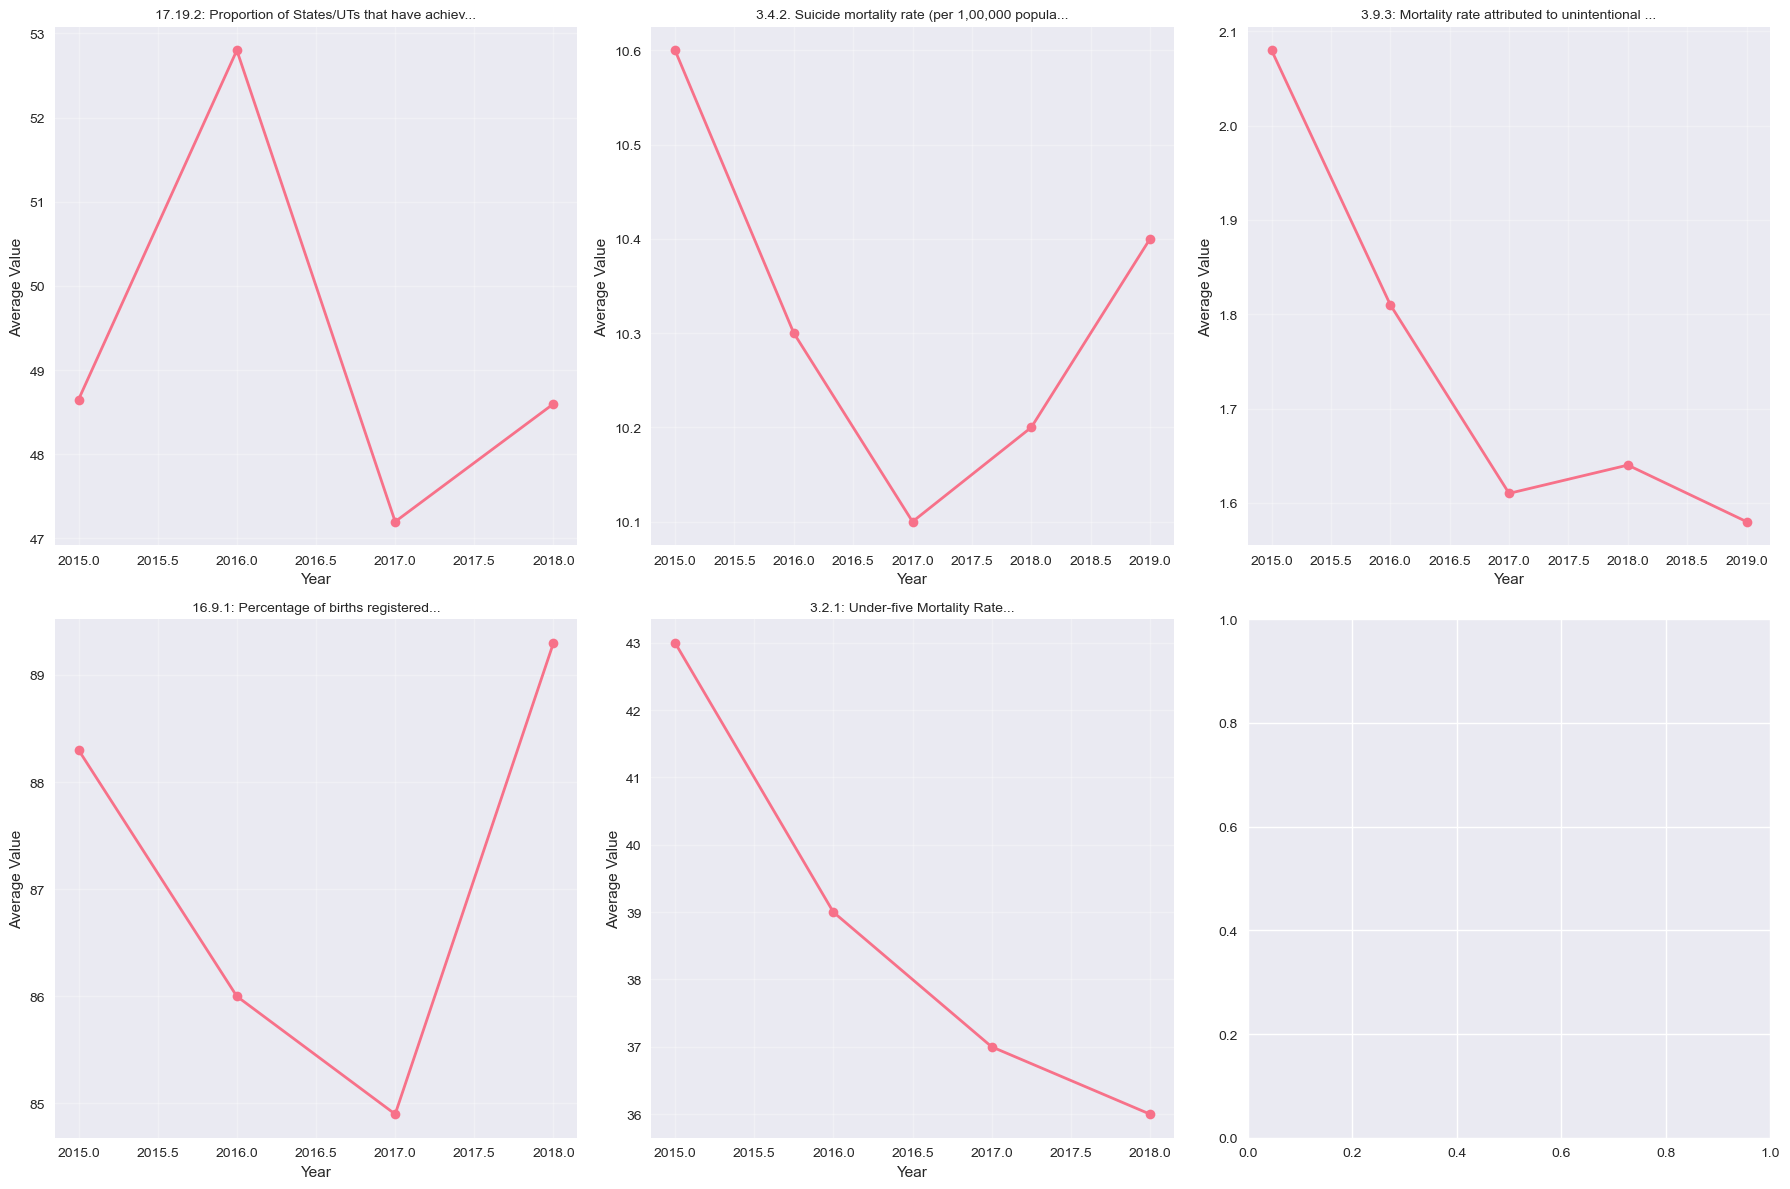

In [17]:
print("\n" + "="*60)
print("TEMPORAL TRENDS ANALYSIS")
print("="*60)

# Analyze trends over time for key indicators
if len(df_2_analysis) > 0:
    key_indicators = df_2_analysis['Indicator'].value_counts().head(5).index

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    for i, indicator in enumerate(key_indicators):
        if i < 6:  # Only plot first 6 indicators
            indicator_data = df_2_analysis[df_2_analysis['Indicator'] == indicator]
            
            # Calculate global/regional averages by year
            yearly_avg = indicator_data.groupby('TimePeriod')['DataValue'].mean().reset_index()
            
            if len(yearly_avg) > 1:
                axes[i].plot(yearly_avg['TimePeriod'], yearly_avg['DataValue'], 
                            marker='o', linewidth=2)
                axes[i].set_title(f'{indicator[:50]}...', fontsize=10)
                axes[i].set_xlabel('Year')
                axes[i].set_ylabel('Average Value')
                axes[i].grid(True, alpha=0.3)
            else:
                axes[i].text(0.5, 0.5, 'Insufficient data\nfor trend analysis', 
                           ha='center', va='center', transform=axes[i].transAxes)
                axes[i].set_title(f'{indicator[:50]}...', fontsize=10)

    plt.tight_layout()
    plt.show()
else:
    print("No data available for temporal trends analysis.")


#### SECTION 6: ANTENATAL CARE AND SKILLED BIRTH ATTENDANCE ANALYSIS


ANTENATAL CARE AND SKILLED BIRTH ATTENDANCE ANALYSIS
Antenatal care data points: 1
Skilled birth attendance data points: 2


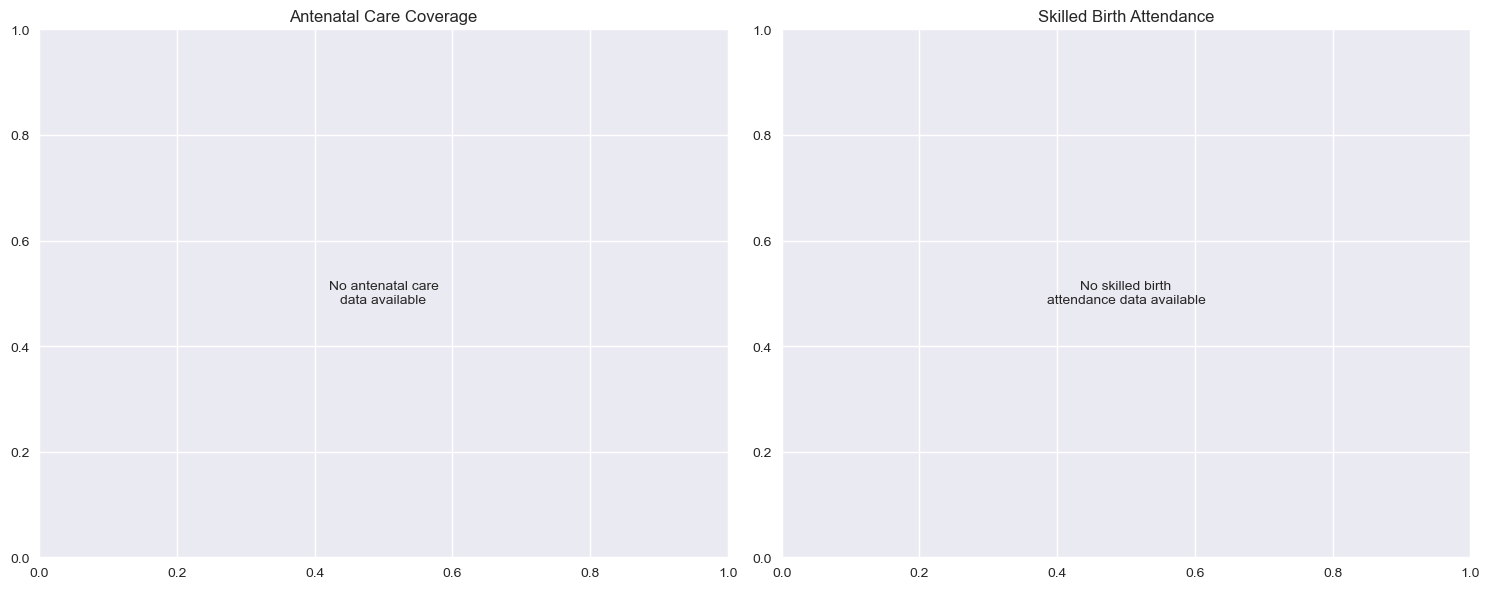

In [19]:
print("\n" + "="*60)
print("ANTENATAL CARE AND SKILLED BIRTH ATTENDANCE ANALYSIS")
print("="*60)

# Filter for antenatal care indicators
anc_keywords = ['antenatal', 'prenatal', 'ante-natal']
anc_mask = df_2_analysis['Indicator'].str.contains('|'.join(anc_keywords), 
                                                case=False, na=False)
df_2_anc = df_2_analysis[anc_mask].copy()

# Filter for skilled birth attendance
skilled_keywords = ['skilled', 'attended', 'delivery']
skilled_mask = df_2_analysis['Indicator'].str.contains('|'.join(skilled_keywords), 
                                                    case=False, na=False)
df_2_skilled = df_2_analysis[skilled_mask].copy()

print(f"Antenatal care data points: {df_2_anc.shape[0]}")
print(f"Skilled birth attendance data points: {df_2_skilled.shape[0]}")

# Visualization for coverage rates
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

if not df_2_anc.empty:
    latest_anc = df_2_anc[df_2_anc['TimePeriod'] == df_2_anc['TimePeriod'].max()]
    if len(latest_anc) > 0:
        axes[0].hist(latest_anc['DataValue'], bins=20, alpha=0.7, color='lightgreen')
        axes[0].set_xlabel('Antenatal Care Coverage (%)')
        axes[0].set_ylabel('Number of Countries')
        axes[0].set_title('Distribution of Antenatal Care Coverage')
    else:
        axes[0].text(0.5, 0.5, 'No antenatal care\ndata available', 
                    ha='center', va='center', transform=axes[0].transAxes)
        axes[0].set_title('Antenatal Care Coverage')
else:
    axes[0].text(0.5, 0.5, 'No antenatal care\ndata available', 
                ha='center', va='center', transform=axes[0].transAxes)
    axes[0].set_title('Antenatal Care Coverage')

if not df_2_skilled.empty:
    latest_skilled = df_2_skilled[df_2_skilled['TimePeriod'] == df_2_skilled['TimePeriod'].max()]
    if len(latest_skilled) > 0:
        axes[1].hist(latest_skilled['DataValue'], bins=20, alpha=0.7, color='lightcoral')
        axes[1].set_xlabel('Skilled Birth Attendance (%)')
        axes[1].set_ylabel('Number of Countries')
        axes[1].set_title('Distribution of Skilled Birth Attendance')
    else:
        axes[1].text(0.5, 0.5, 'No skilled birth\nattendance data available', 
                    ha='center', va='center', transform=axes[1].transAxes)
        axes[1].set_title('Skilled Birth Attendance')
else:
    axes[1].text(0.5, 0.5, 'No skilled birth\nattendance data available', 
                ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('Skilled Birth Attendance')

plt.tight_layout()
plt.show()

#### SECTION 7: ADOLESCENT BIRTH RATE ANALYSIS



ADOLESCENT BIRTH RATE ANALYSIS
Adolescent birth rate data points: 4


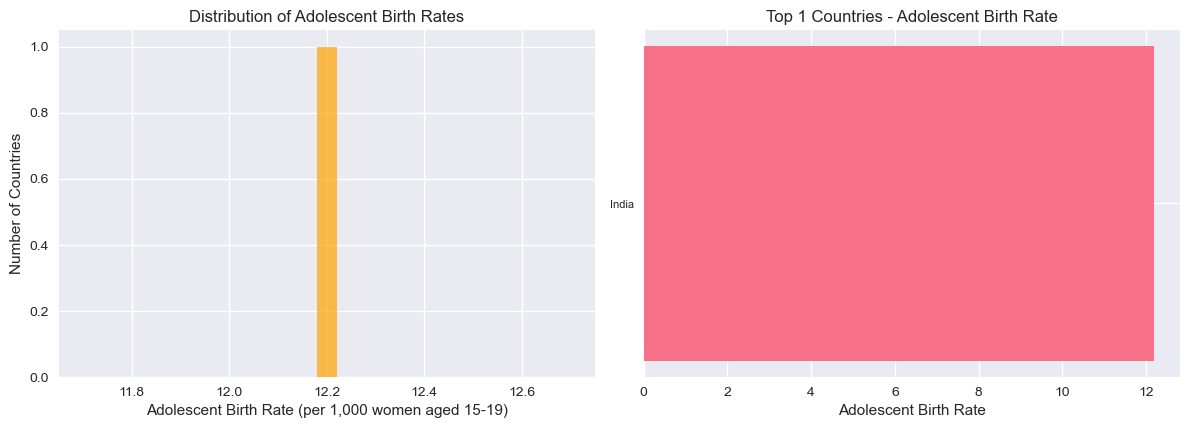

In [23]:
print("\n" + "="*60)
print("ADOLESCENT BIRTH RATE ANALYSIS")
print("="*60)

# Filter for adolescent birth rate
adolescent_keywords = ['adolescent', 'teenage', 'teen']
adolescent_mask = df_2_analysis['Indicator'].str.contains('|'.join(adolescent_keywords), 
                                                       case=False, na=False)
df_2_adolescent = df_2_analysis[adolescent_mask].copy()

print(f"Adolescent birth rate data points: {df_2_adolescent.shape[0]}")

if not df_2_adolescent.empty:
    latest_adolescent = df_2_adolescent[df_2_adolescent['TimePeriod'] == df_2_adolescent['TimePeriod'].max()]
    
    if len(latest_adolescent) > 0:
        # Visualization
        plt.figure(figsize=(12, 8))
        
        plt.subplot(2, 2, 1)
        plt.hist(latest_adolescent['DataValue'], bins=25, alpha=0.7, color='orange')
        plt.xlabel('Adolescent Birth Rate (per 1,000 women aged 15-19)')
        plt.ylabel('Number of Countries')
        plt.title('Distribution of Adolescent Birth Rates')
        
        plt.subplot(2, 2, 2)
        if len(latest_adolescent) >= 15:
            top_adolescent = latest_adolescent.nlargest(15, 'DataValue')
        else:
            top_adolescent = latest_adolescent.nlargest(len(latest_adolescent), 'DataValue')
        
        plt.barh(range(len(top_adolescent)), top_adolescent['DataValue'])
        plt.yticks(range(len(top_adolescent)), top_adolescent['AreaName'], fontsize=8)
        plt.xlabel('Adolescent Birth Rate')
        plt.title(f'Top {len(top_adolescent)} Countries - Adolescent Birth Rate')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No adolescent birth rate data available for the latest year.")
else:
    print("No adolescent birth rate data found in the dataset.")


#### SECTION 8: CORRELATION ANALYSIS


CORRELATION ANALYSIS


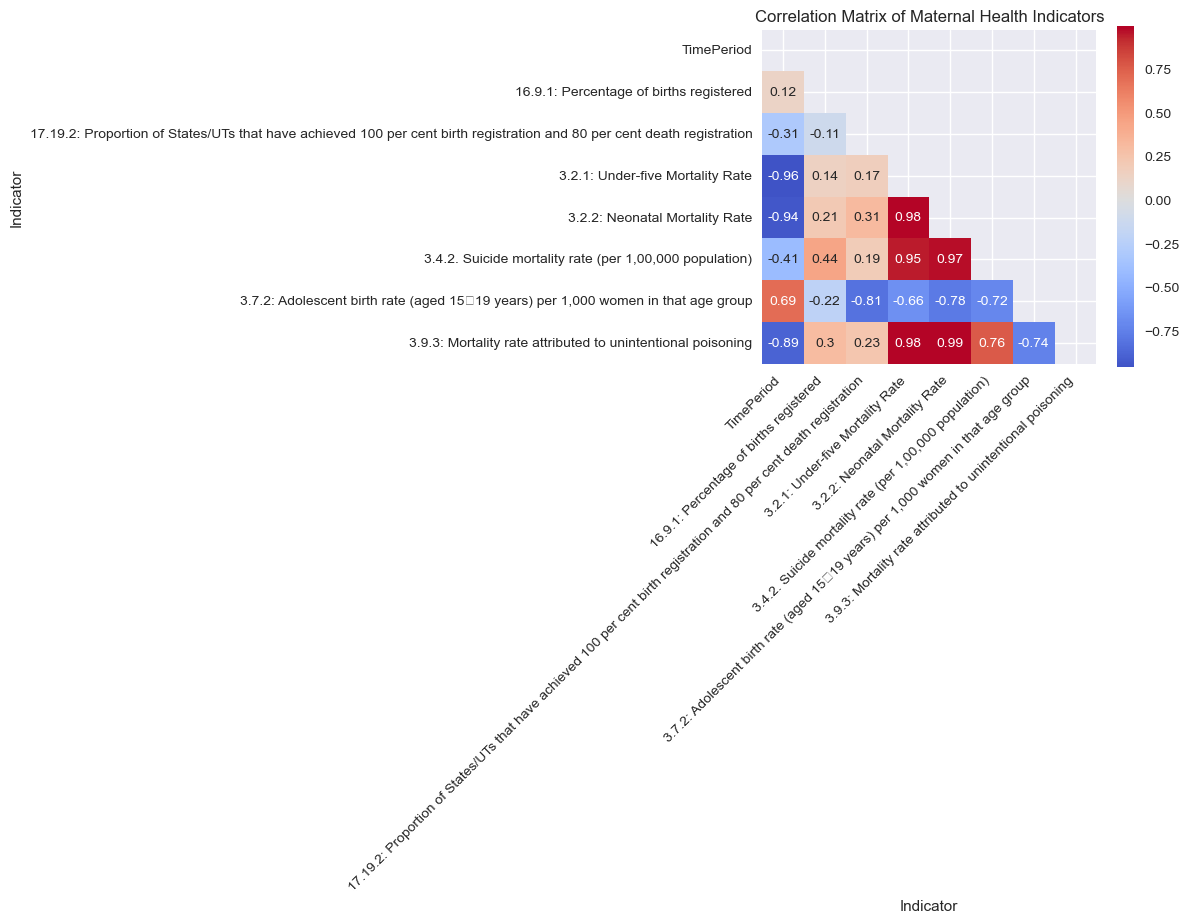

In [25]:
print("\n" + "="*60)
print("CORRELATION ANALYSIS")
print("="*60)

if len(df_2_analysis) > 0:
    # Create a correlation matrix for different indicators
    # Pivot data to have indicators as columns
    try:
        correlation_data = df_2_analysis.pivot_table(
            index=['AreaName', 'TimePeriod'], 
            columns='Indicator', 
            values='DataValue', 
            aggfunc='mean'
        ).reset_index()

        # Calculate correlation matrix
        numeric_cols = correlation_data.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 2:  # Need at least 2 numeric columns for correlation
            correlation_matrix = correlation_data[numeric_cols].corr()

            # Plot correlation heatmap
            plt.figure(figsize=(12, 10))
            mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                        square=True, mask=mask, cbar_kws={"shrink": .8})
            plt.title('Correlation Matrix of Maternal Health Indicators')
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()
        else:
            print("Insufficient numeric data for correlation analysis.")
            print(f"Only {len(numeric_cols)} numeric columns available.")
    except Exception as e:
        print(f"Error in correlation analysis: {str(e)}")
        print("Skipping correlation matrix due to data structure issues.")
else:
    print("No data available for correlation analysis.")


#### SECTION 9: REGIONAL ANALYSIS


REGIONAL ANALYSIS
Regional Analysis Summary:
------------------------------
  Subgroup                                          Indicator        mean  \
0   1 year  3.7.3: Percentage of institutional births (per...   82.600000   
1   5 year  3.7.3: Percentage of institutional births (per...   78.900000   
2    Birth  17.19.2: Proportion of States/UTs that have ac...   38.200000   
3    Death  17.19.2: Proportion of States/UTs that have ac...   60.425000   
4    Total            16.9.1: Percentage of births registered   87.125000   
5    Total  3.1.1: Maternal Mortality Ratio (MMR), (per 1,...  121.666667   
6    Total  3.1.2: Percentage of births attended by skille...   81.400000   
7    Total  3.1.3: Percentage of births attended by skille...   84.400000   
8    Total  3.1.4: Percentage of women aged 15-49 years wi...   51.200000   
9    Total                     3.2.2: Neonatal Mortality Rate   23.750000   

   median       std  count  
0   82.60       NaN      1  
1   78.90       N

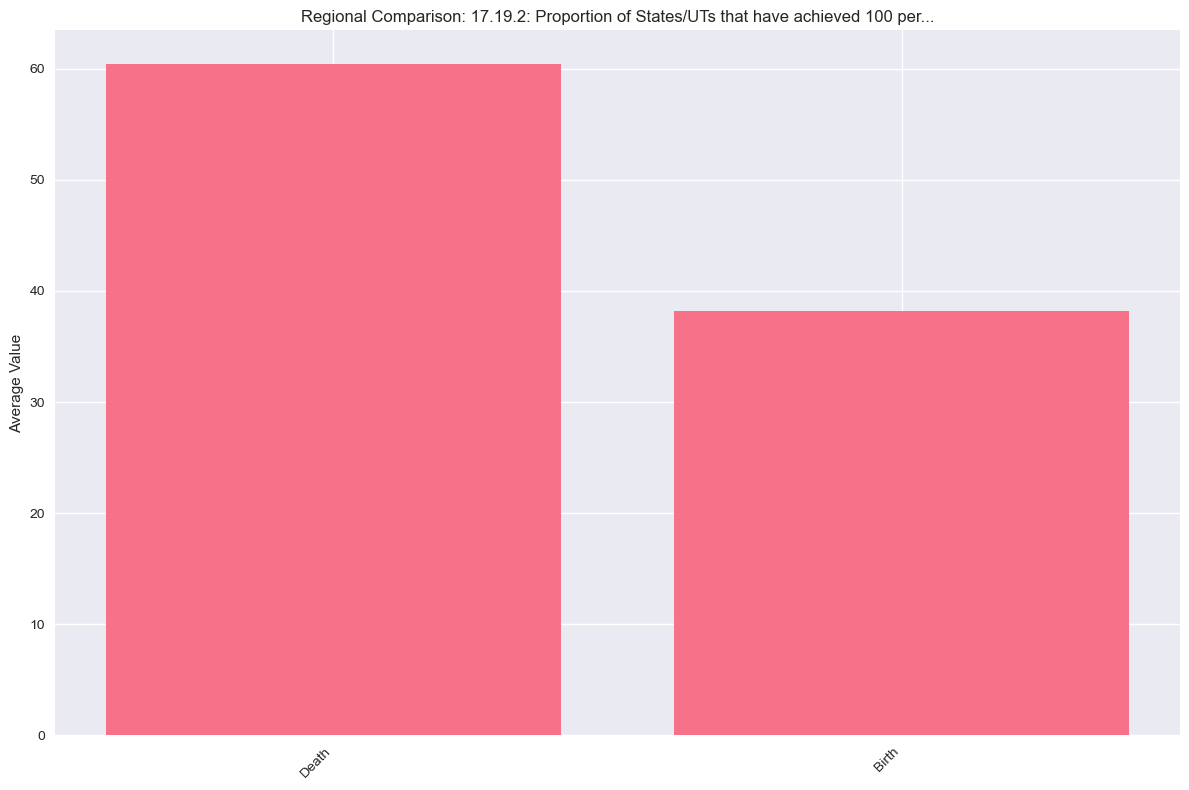

In [27]:
print("\n" + "="*60)
print("REGIONAL ANALYSIS")
print("="*60)

# Analyze by subgroups (regions/income levels)
if 'Subgroup' in df_2_analysis.columns and len(df_2_analysis) > 0:
    try:
        regional_analysis = df_2_analysis.groupby(['Subgroup', 'Indicator'])['DataValue'].agg([
            'mean', 'median', 'std', 'count'
        ]).reset_index()
        
        print("Regional Analysis Summary:")
        print("-" * 30)
        print(regional_analysis.head(10))
        
        # Visualize regional differences for key indicators
        key_indicator = df_2_analysis['Indicator'].value_counts().index[0]
        regional_data = df_2_analysis[df_2_analysis['Indicator'] == key_indicator]
        
        if not regional_data.empty and len(regional_data['Subgroup'].unique()) > 1:
            plt.figure(figsize=(12, 8))
            regional_summary = regional_data.groupby('Subgroup')['DataValue'].mean().sort_values(ascending=False)
            
            plt.bar(range(len(regional_summary)), regional_summary.values)
            plt.xticks(range(len(regional_summary)), regional_summary.index, rotation=45, ha='right')
            plt.ylabel('Average Value')
            plt.title(f'Regional Comparison: {key_indicator[:60]}...')
            plt.tight_layout()
            plt.show()
        else:
            print("Insufficient regional data for visualization.")
    except Exception as e:
        print(f"Error in regional analysis: {str(e)}")
        print("Skipping regional analysis due to data structure issues.")
else:
    print("No 'Subgroup' column found or no data available for regional analysis.")


#### SECTION 10: PROGRESS TRACKING AND SDG 3.1 ASSESSMENT

In [29]:
print("\n" + "="*60)
print("PROGRESS TRACKING AND SDG 3.1 ASSESSMENT")
print("="*60)

# Calculate progress metrics
def calculate_progress_metrics(df_2):
    metrics = {}
    
    # Overall statistics
    metrics['total_countries'] = df_2['AreaName'].nunique()
    metrics['total_indicators'] = df_2['Indicator'].nunique()
    metrics['time_span'] = f"{df_2['TimePeriod'].min()} - {df_2['TimePeriod'].max()}"
    metrics['data_points'] = len(df_2)
    
    return metrics

if len(df_2_analysis) > 0:
    progress_metrics = calculate_progress_metrics(df_2_analysis)

    print("Progress Tracking Metrics:")
    print("-" * 30)
    for key, value in progress_metrics.items():
        print(f"{key.replace('_', ' ').title()}: {value}")
else:
    print("No data available for progress tracking metrics.")

# SDG 3.1 Target Assessment
if not df_2_mmr.empty:
    latest_mmr_data = df_2_mmr[df_2_mmr['TimePeriod'] == df_2_mmr['TimePeriod'].max()]
    
    if len(latest_mmr_data) > 0:
        target_met = len(latest_mmr_data[latest_mmr_data['DataValue'] < 70])
        total_countries = len(latest_mmr_data)
        percentage_meeting_target = (target_met / total_countries) * 100
        
        print(f"\nSDG 3.1 Target Assessment (MMR < 70 per 100,000):")
        print("-" * 50)
        print(f"Countries meeting target: {target_met}")
        print(f"Total countries with data: {total_countries}")
        print(f"Percentage meeting target: {percentage_meeting_target:.1f}%")
        
        # Countries still needing improvement
        need_improvement = latest_mmr_data[latest_mmr_data['DataValue'] >= 70]
        print(f"Countries needing improvement: {len(need_improvement)}")
        
        if len(need_improvement) > 0:
            print("\nTop 10 countries with highest MMR (need urgent attention):")
            top_priority = need_improvement.nlargest(min(10, len(need_improvement)), 'DataValue')[['AreaName', 'DataValue']]
            for idx, row in top_priority.iterrows():
                print(f"  {row['AreaName']}: {row['DataValue']:.1f}")
    else:
        print(f"\nSDG 3.1 Target Assessment:")
        print("-" * 50)
        print("No maternal mortality data available for the latest year.")
        print("Unable to assess SDG 3.1 target achievement.")
else:
    print(f"\nSDG 3.1 Target Assessment:")
    print("-" * 50)
    print("No maternal mortality ratio data found in the dataset.")
    print("This could be because:")
    print("• The indicators don't contain 'maternal mortality' keywords")
    print("• The data is recorded with different terminology")
    print("• No MMR data is available in this dataset")
    
    if len(df_2_analysis) > 0:
        print(f"\nAvailable indicators in dataset:")
        print("-" * 40)
        for i, indicator in enumerate(df_2_analysis['Indicator'].unique()[:10], 1):
            print(f"{i}. {indicator}")
        if len(df_2_analysis['Indicator'].unique()) > 10:
            print(f"... and {len(df_2_analysis['Indicator'].unique()) - 10} more indicators")
        
        print(f"\nALTERNATIVE SDG 3.1 ASSESSMENT using available indicators:")
        print("-" * 60)
        
        # Alternative assessment using key maternal health indicators
        alternative_indicators = {
            'antenatal': 'Antenatal care coverage (indicator of healthcare access)',
            'skilled': 'Skilled birth attendance (critical for reducing MMR)',
            'adolescent': 'Adolescent birth rate (risk factor for maternal mortality)',
            'family planning': 'Family planning coverage (prevention indicator)'
        }
        
        for keyword, description in alternative_indicators.items():
            indicator_data = df_2_analysis[df_2_analysis['Indicator'].str.contains(
                keyword, case=False, na=False)]
            
            if not indicator_data.empty:
                latest_data = indicator_data[indicator_data['TimePeriod'] == indicator_data['TimePeriod'].max()]
                avg_value = latest_data['DataValue'].mean()
                countries_count = len(latest_data)
                
                print(f"\n• {description}")
                print(f"  Countries with data: {countries_count}")
                print(f"  Average value: {avg_value:.1f}")
                
                # Set benchmarks based on indicator type
                if 'antenatal' in keyword or 'skilled' in keyword:
                    if avg_value >= 90:
                        status = "EXCELLENT (≥90%)"
                    elif avg_value >= 75:
                        status = "GOOD (75-89%)"
                    elif avg_value >= 50:
                        status = "MODERATE (50-74%)"
                    else:
                        status = "NEEDS IMPROVEMENT (<50%)"
                elif 'adolescent' in keyword:
                    if avg_value <= 20:
                        status = "EXCELLENT (≤20 per 1,000)"
                    elif avg_value <= 50:
                        status = "GOOD (21-50 per 1,000)"
                    elif avg_value <= 100:
                        status = "MODERATE (51-100 per 1,000)"
                    else:
                        status = "NEEDS IMPROVEMENT (>100 per 1,000)"
                else:
                    status = "DATA AVAILABLE"
                
                print(f"  Assessment: {status}")
        
        print(f"\nSuggestion: While direct MMR data isn't available, these indicators")
        print("provide insights into maternal health system performance and risk factors")
        print("that directly influence maternal mortality outcomes.")
        
    else:
        print("No indicators available in the filtered dataset.")



PROGRESS TRACKING AND SDG 3.1 ASSESSMENT
Progress Tracking Metrics:
------------------------------
Total Countries: 1
Total Indicators: 13
Time Span: 2015.0 - 2019.0
Data Points: 45

SDG 3.1 Target Assessment:
--------------------------------------------------
No maternal mortality data available for the latest year.
Unable to assess SDG 3.1 target achievement.


#### SECTION 11: SUMMARY AND RECOMMENDATIONS

In [31]:
print("\n" + "="*60)
print("SUMMARY AND RECOMMENDATIONS")
print("="*60)

if len(df_2_analysis) > 0:
    summary_stats = df_2_analysis.groupby('Indicator')['DataValue'].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(2)

    print("Summary Statistics by Indicator:")
    print("-" * 40)
    print(summary_stats)

    print("\n" + "="*60)
    print("KEY FINDINGS AND RECOMMENDATIONS")
    print("="*60)

    findings = [
        "1. DATA COVERAGE: Analyze the completeness of data across countries and time periods",
        "2. REGIONAL DISPARITIES: Identify regions with significant maternal health challenges",
        "3. PROGRESS TRENDS: Track improvement or deterioration in key indicators over time",
        "4. TARGET ACHIEVEMENT: Assess how many countries are on track to meet SDG 3.1",
        "5. PRIORITY AREAS: Focus on countries with highest maternal mortality ratios",
        "6. INTERVENTION EFFECTIVENESS: Correlate healthcare investments with outcomes"
    ]

    for finding in findings:
        print(finding)

    print("\n" + "="*60)
    print("NEXT STEPS FOR ANALYSIS")
    print("="*60)

    next_steps = [
        "• Conduct deeper regional analysis by income groups",
        "• Analyze correlation between healthcare expenditure and outcomes",
        "• Create predictive models for SDG 3.1 target achievement",
        "• Identify successful intervention strategies from top-performing countries",
        "• Develop country-specific recommendations based on current status"
    ]

    for step in next_steps:
        print(step)
else:
    print("No data available for summary statistics and recommendations.")
    print("Please check your dataset and ensure it contains the required columns:")
    print("• AreaName, TimePeriod, Indicator, DataValue")

print(f"\n{'='*60}")
print("ANALYSIS COMPLETED SUCCESSFULLY")
print(f"{'='*60}")

# Save processed data for further analysis
try:
    if len(df_2_analysis) > 0:
        # df_2_analysis.to_csv('processed_maternal_health_data.csv', index=False)
        # print("\nProcessed data saved as 'processed_maternal_health_data.csv'")
        print(f"\nFinal dataset shape: {df_2_analysis.shape}")
        print("Analysis ready for further exploration and modeling!")
    else:
        print("\nNo processed data to save. Dataset may be empty or missing required indicators.")
        print("Please verify your dataset contains maternal health related indicators.")
except Exception as e:
    print(f"\nNote: {str(e)}")
    print("Analysis completed with available data.")


SUMMARY AND RECOMMENDATIONS
Summary Statistics by Indicator:
----------------------------------------
                                                    count    mean    std  \
Indicator                                                                  
16.9.1: Percentage of births registered                 4   87.12   2.03   
17.19.2: Proportion of States/UTs that have ach...      8   49.31  12.40   
3.1.1: Maternal Mortality Ratio (MMR), (per 1,0...      3  121.67   8.50   
3.1.2: Percentage of births attended by skilled...      1   81.40    NaN   
3.1.3: Percentage of births attended by skilled...      1   84.40    NaN   
3.1.4: Percentage of women aged 15-49 years wit...      1   51.20    NaN   
3.2.1: Under-five Mortality Rate                        4   38.75   3.10   
3.2.2: Neonatal Mortality Rate                          4   23.75   0.96   
3.4.2. Suicide mortality rate (per 1,00,000 pop...      5   10.32   0.19   
3.7.2: Adolescent birth rate (aged 1519 years)...      4   1

In [41]:
# =============================================
# MACHINE LEARNING MODEL: Predicting Mortality Rate
# =============================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing DataValue
ml_df = df_2_clean.dropna(subset=['DataValue'])

# Extract year safely
ml_df['Year'] = ml_df['TimePeriod'].astype(str).str.extract(r'(\d{4})').astype(float)

# Encode categorical variables
categorical_cols = ['AreaName', 'Indicator', 'Unit', 'Source']
for col in categorical_cols:
    ml_df[col] = ml_df[col].astype(str)  # Ensure strings
    le = LabelEncoder()
    ml_df[col] = le.fit_transform(ml_df[col])

# Define features and target
features = ['AreaName', 'Indicator', 'Unit', 'Source', 'Year']
target = 'DataValue'

X = ml_df[features]
y = ml_df[target]

# Handle any missing values
X = X.dropna()
y = y.loc[X.index]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Example: Predict for a new region and indicator
sample_input = X_test.iloc[0:1]
predicted_value = lr.predict(sample_input)[0]
print(f"\nPredicted Maternal Mortality Rate for Sample Input: {predicted_value:.2f}")


R-squared: -1.1805175134675707
RMSE: 17399.48223489501

Predicted Maternal Mortality Rate for Sample Input: 26958.94
